## Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
import pickle

%matplotlib inline

## Reading dataset
dataset18000.txt files contains the actual facebook comments  
dataResult.txt files contains correspoding comment label  

In [2]:
comments = open('dataset18000.txt', encoding='utf-8').readlines()
label = open('dataResult.txt').readlines()

data = pd.DataFrame({'comment': comments, 'label': label})
data.comment = data.comment.apply(lambda x: x.strip())
data.label = data.label.apply(lambda x: int(x.strip()))
data.label = data.label.astype('int32')

n_data = pd.read_csv('new_data.csv')
data = data.append(n_data, ignore_index=True)
data.tail()

,comment,label
20209,লসের সম্ভাবনা নাই,0
20210,হিন্দুদের কাছে শয়তানও হার মানে তারা হলো শয়তানে...,3
20211,আমার তো তোমারেই মনে পড়ে,0
20212,কোপালে জেয় কোন টিপ দেওয়া হারাম।,2
20213,অনেক সুনদর,0


## Number of comments against each category

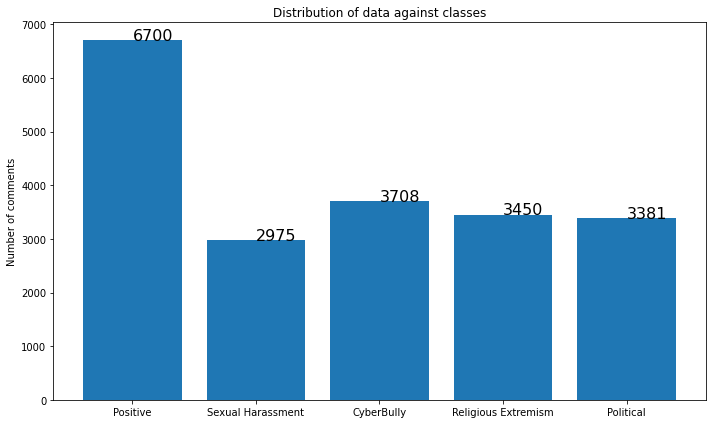

In [3]:
N = 5
freq = data.label.value_counts()
freqs = [freq[x] for x in range(5)]
ind = np.arange(N)

plt.figure(figsize=(10,6))
plt.title('Distribution of data against classes')
plt.ylabel('Number of comments')
plt.bar(ind, freqs, tick_label=['Positive', 'Sexual Harassment', 'CyberBully', 'Religious Extremism', 'Political'])
for index, countData in enumerate(freqs):
    plt.text(x=index , y=countData+2, s=f"{round(countData, 2)}", fontdict=dict(fontsize=16))
plt.tight_layout()
plt.show()

## Use CountVectorizer for counting the n-gram frequency

In [4]:
vec = CountVectorizer(ngram_range=(1, 3))
vec.fit(data.comment.values)

X = vec.transform(data.comment.values)
y = data.label.values
print(X.shape, y.shape)

(20214, 72716) (20214,)


## Splittig train and test data. Uses 75% data for training and 25% for testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(15160, 72716) (5054, 72716)


## Naive bayes

In [6]:
from sklearn.naive_bayes import MultinomialNB

accs = []
clf = MultinomialNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)
accs.append(acc)
print('Accuracy:', acc)
print('Confusion Matrix:')
print(cnf)

Accuracy: 0.7324891175306688
Confusion Matrix:
[[1508   26  111   40   37]
 [ 309  284   83   28   28]
 [ 384   40  394   47   30]
 [  69    4    6  730   19]
 [  31    5   11   44  786]]


## Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)
accs.append(acc)
print('Accuracy:', acc)
print('Confusion Matrix:')
print(cnf)

Accuracy: 0.7574198654531065
Confusion Matrix:
[[1508   51  126   25   12]
 [ 261  344  102   15   10]
 [ 342   65  462   13   13]
 [  63    7   12  745    1]
 [  62    8   12   26  769]]


## Support vector machine

In [8]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)
accs.append(acc)
print('Accuracy:', acc)
print('Confusion Matrix:')
print(cnf)

Accuracy: 0.7435694499406411
Confusion Matrix:
[[1506   50  116   35   15]
 [ 274  335  100    9   14]
 [ 372   69  424   18   12]
 [  65    7   10  745    1]
 [  81   16   10   22  748]]


## multilayer perceptron

In [9]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(8,))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

acc = accuracy_score(y_test, pred)
cnf = confusion_matrix(y_test, pred)
print('Accuracy:', acc)
print('Confusion Matrix:')
print(cnf)
accs.append(acc)

Accuracy: 0.7390185991294025
Confusion Matrix:
[[1414   92  175   36    5]
 [ 223  370  112   21    6]
 [ 304   99  464   23    5]
 [  45    4   14  761    4]
 [  72   15   34   30  726]]


## Performance comparison

[0.7324891175306688, 0.7574198654531065, 0.7435694499406411, 0.7390185991294025]


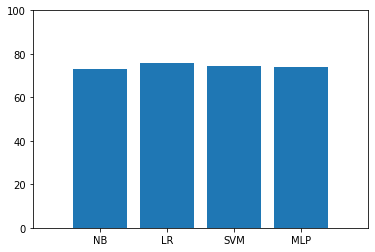

In [10]:
print(accs)
plt.bar([1, 2, 3, 4], [x*100 for x in accs], 0.8, tick_label=['NB', 'LR', 'SVM', 'MLP'])
plt.xlim(0, 5)
plt.ylim(0, 100)
plt.show()

In [11]:
f_vec = 'vectorizer.pkl'
f_lr = 'svm.pkl'

pickle.dump(vec, open(f_vec, 'wb'))
svm = SVC(kernel='linear')
svm.fit(X, y)
pickle.dump(svm, open(f_lr, 'wb'))
print('Done...')

Done...


## Deep learning models
## Importing tensorflow and keras for bulding RNNs and CNNs

In [12]:
from tensorflow.keras.layers import Embedding, Input, LSTM, Dense, MaxPooling1D, GlobalMaxPooling1D, Dropout, GRU
from tensorflow.keras.layers import Conv1D, Flatten,Bidirectional
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import losses, optimizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.activations import softmax
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Used tokenizer to convert word sequences into corresponding number sequneces and padding to make all sequneces equal length

In [13]:
max_feautres = 10000
tok = Tokenizer(num_words=max_feautres)
tok.fit_on_texts(data.comment)
print('Total tokens:', len(tok.word_index))

seq_len = 100
data['comment_seq'] = tok.texts_to_sequences(data.comment)
X = pad_sequences(data.comment_seq, maxlen=seq_len)

Total tokens: 23132


### Convert label to one hot encoding

In [14]:
y = to_categorical(data.label, num_classes=N)

### Train test split. 25% data used for testing

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

### Neural network parameters

In [16]:
emmbed_size = 32
lstm_size = 64
batch_size = 300
n_layers = 2
n_input = seq_len

### RNN using lstm

In [17]:
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
for layer in range(n_layers):
    x = LSTM(lstm_size // (layer+1), return_sequences=True)(x)
    x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(5, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 100, 64)           24832     
                                                                 
 dropout (Dropout)           (None, 100, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 32)           12416     
                                                                 
 dropout_1 (Dropout)         (None, 100, 32)           0         
                                                                 
 flatten (Flatten)           (None, 3200)              0     

### Performance of RNN

In [18]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
rnnAc = accuracy_score(y_tmp, pred)
cnf = confusion_matrix(y_tmp, pred)

print('RNN:', rnnAc)
print(cnf)
accs.append(rnnAc)

RNN: 0.8098535813217254
[[1299   50  287   28   17]
 [  52  560  111    8    0]
 [ 200   85  623    8    4]
 [  11    5    8  840    7]
 [  22    9   27   22  771]]


### 1 dimensional CVV

In [19]:
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
x = Conv1D(32, 5, strides=1)(x)
x = MaxPooling1D(pool_size=2)(x)
x = Dropout(0.2)(x)
x = Conv1D(15, 10, strides=1)(x)
x = MaxPooling1D(pool_size=5)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(5, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 50, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 96, 32)            5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 32)           0         
 )                                                               
                                                                 
 dropout_3 (Dropout)         (None, 48, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 39, 15)            4815      
                                                           

### Performance of CNN

In [20]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
cnnAc = accuracy_score(y_tmp, pred)
cnf = confusion_matrix(y_tmp, pred)

print('CNN:', cnnAc)
print(cnf)
accs.append(cnnAc)

CNN: 0.5589631974673526
[[1596   13   43   17   12]
 [ 605  100   11    7    8]
 [ 783   21   99    8    9]
 [ 442    0    2  427    0]
 [ 194    7   27   20  603]]


### CNN and RNN combined model

In [21]:
inp = Input(shape=(n_input, ))
x = Embedding(max_feautres, emmbed_size, input_length=n_input)(inp)
for _ in range(1):
    x = LSTM(32, return_sequences=True)(x)
    x = Dropout(0.2)(x)
x = Conv1D(32, 5, strides=1)(x)
x = MaxPooling1D(pool_size=3)(x)
x = Dropout(0.2)(x)
x = Flatten()(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(5, activation='softmax')(x)

model = Model(inputs=inp, outputs=x)
model.summary()

model.compile(loss=losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 30, batch_size=batch_size, validation_data=(X_test, y_test), verbose=2, shuffle=True)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_2 (LSTM)               (None, 100, 32)           8320      
                                                                 
 dropout_6 (Dropout)         (None, 100, 32)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 32)            5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 32, 32)           0         
 1D)                                                             
                                                           

### Performance of RCNN

In [22]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_tmp = np.argmax(y_test, axis=1)
rnnCnnAc = accuracy_score(y_tmp, pred)
cnf = confusion_matrix(y_tmp, pred)

print('RCNN:', rnnCnnAc)
print(cnf)
accs.append(rnnCnnAc)

RCNN: 0.795607439651761
[[1300   55  282   36    8]
 [  55  533  120   20    3]
 [ 208  104  584   22    2]
 [  18    9    5  839    0]
 [  13   17   10   46  765]]


### Comparison

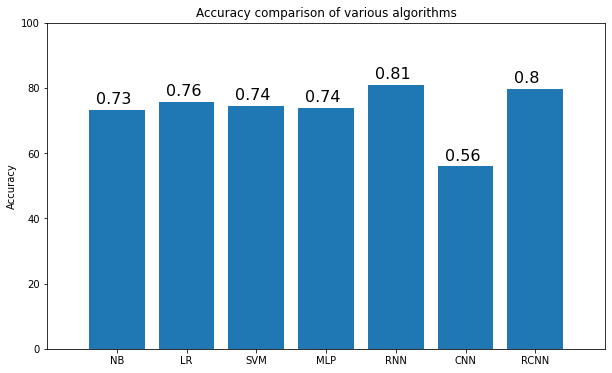

In [33]:
plt.figure(figsize=(10,6))
plt.title('Accuracy comparison of various algorithms')
plt.ylabel('Accuracy')
plt.bar(np.arange(len(accs)), [x*100 for x in accs], 0.8, tick_label=['NB', 'LR', 'SVM', 'MLP', 'RNN', 'CNN', 'RCNN'])
plt.ylim(0, 100)
plt.xlim(-1, 7)
for index, countData in enumerate(accs):
    plt.text(x=index-0.3, y=countData*100+2, s=f"{round(countData, 2)}", fontdict=dict(fontsize=16))
plt.show()